In [108]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn import metrics
plt.style.use('fivethirtyeight')
import numpy as np

<ipython-input-108-fb1cbfb9c730>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [109]:
%matplotlib inline
df1 = pd.read_csv("../Datasets/03-01-2019-TO-01-01-2021SBINALLN.csv",delimiter=',',header=None,skiprows=1,names=['Symbol','Series','Date','PrevClose','Open','High','Low','AdjClose','Close','AvegPrice','TotTradQty','TurnoverInLacks','No.ofTrades','DeliverableQty','%DlyQtToTradedQty'])
df2 = df1[df1['Series'].isin(['EQ'])].filter(['Date','Close','PrevClose'])
df2.head()

,Date,Close,PrevClose
0,03-01-19,291.10,293.90
2,04-01-19,297.65,291.10
5,07-01-19,296.30,297.65
7,08-01-19,305.30,296.30
9,09-01-19,305.30,305.30


In [110]:
forecast_out = 30
X = np.array(df2.drop(['Date','PrevClose'],1))
X = X[:-forecast_out]


In [111]:
Y = np.array(df2['PrevClose'])
Y = Y[:-forecast_out]


In [112]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.009)

In [172]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svr = SVR(kernel='linear',C=1e4, gamma = 0.2,max_iter=-1,
    degree=3,
    coef0=0.0,
    tol=0.001,
    epsilon=0.5,
    shrinking=True,
    cache_size=500,
    verbose=True,
   
)
svr.fit(train_x,train_y)

[LibSVM]

SVR(C=10000.0, cache_size=500, epsilon=0.5, gamma=0.2, kernel='linear',
    verbose=True)

In [173]:
svm_prediction = svr.predict(test_x)

In [174]:
dframe_svr = pd.DataFrame({'Actual':test_y.flatten(),'Predicted':svm_prediction.flatten()})
dframe_svr.head(10)

,Actual,Predicted
0,306.00,338.862795
1,281.85,292.533443
2,183.00,186.158070
3,183.50,180.011179
4,318.45,316.893346


In [175]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y,svm_prediction))
print('Mean Squred Error:', metrics.mean_squared_error(test_y,svm_prediction))
print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(test_y,svm_prediction)))


Mean Absolute Error: 10.349956577541468
Mean Squred Error: 243.73353717485534
Root Mean Squred Error: 15.611967754734037


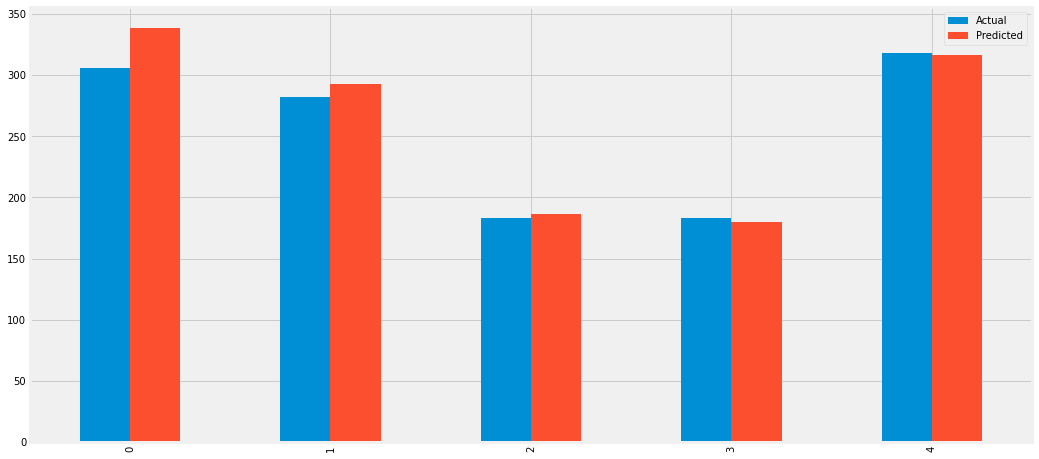

In [176]:
graph = dframe_svr.head(30)
graph.plot(kind='bar',figsize=(16,8))

In [177]:
X1 = np.array(df2.drop(['Date','PrevClose'],1))
svm_prediction_all = svr.predict(X1)

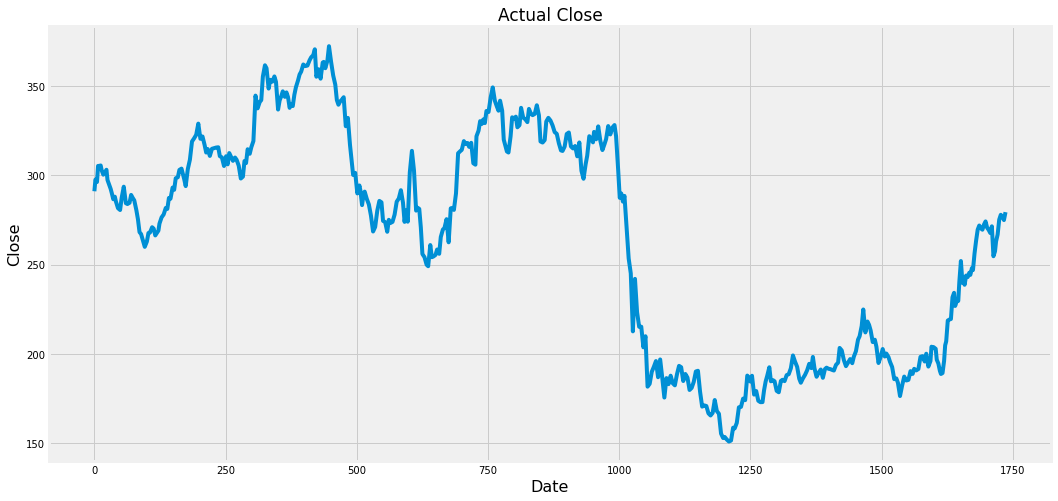

In [187]:
plt.figure(figsize=(16,8))
plt.title('Actual Close',fontsize=17)
plt.plot(df2['Close'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

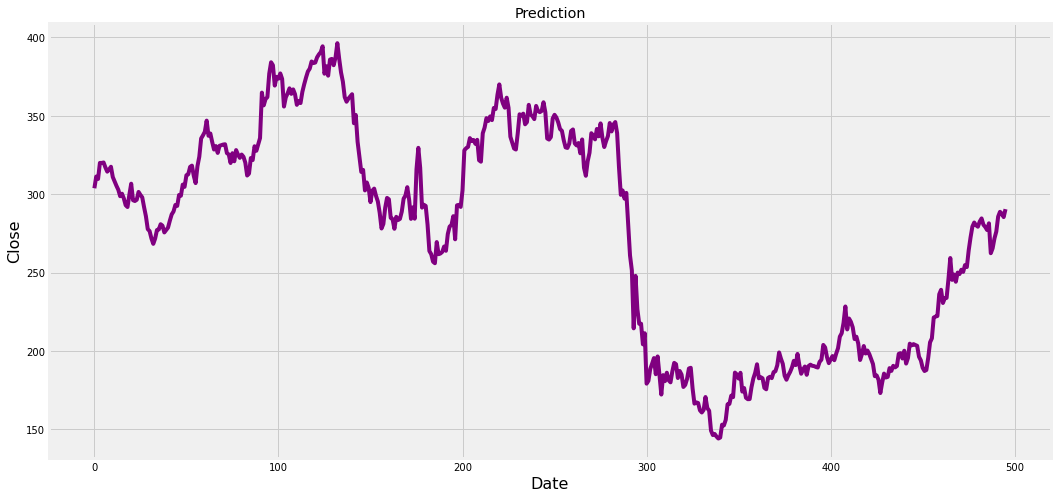

In [186]:
pred = pd.DataFrame({'PredictionOfAll':svm_prediction_all.flatten()})
pred = pred[['PredictionOfAll']]
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.plot(pred,color='purple')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

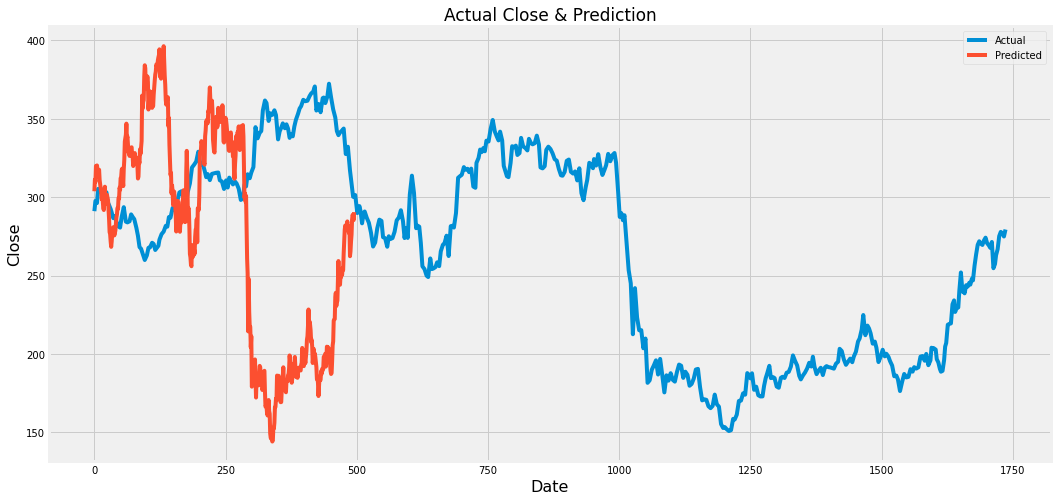

In [180]:
plt.figure(figsize=(16,8))
plt.title('Actual Close & Prediction',fontsize=17)
plt.plot(df2['Close'])
plt.plot(svm_prediction_all)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)
plt.show()

In [188]:
x_forecast = np.array(df2.drop(['Date','PrevClose'],1))[-forecast_out:]

In [189]:
svr.predict(x_forecast)

array([245.35036074, 248.76529621, 244.15513038, 250.01744436,
       249.04987954, 251.83874535, 250.47277211, 254.79835962,
       253.54621362, 264.18944394, 272.38530051, 279.32901084,
       281.94713043, 280.18274449, 279.27209472, 282.57320141,
       284.56525253, 280.52424072, 279.10134911, 277.16621613,
       281.43489193, 262.36814331, 265.49850392, 271.81614422,
       276.19864451, 285.70356487, 288.77700781, 287.63869785,
       285.41898464, 290.48448013])